In [ ]:
#Distinguere le categorie dataset, come?
#Nomi Features
#Numero o tipo features
#Metadati!
#Metodi di raccolta


In [107]:
#CLUSTERING 
#Test con 28 dataset
#Nomedataset$categoria!

#Carico il json

import json
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Carica i dati dal JSON
with open('export.json', 'r') as file:
    data = json.load(file)

    

In [108]:
#il primo elemento nella lista è la categoria e viene tolta, le altre sono features
#features to string
set_features = []
categories = []

for dataset in data:
    s = ""
    first_element_added = False  # per tenere traccia del primo elemento

    for el in data[dataset]:
        if not first_element_added:
            categories.append(el)  # Aggiungi il primo elemento a categories
            first_element_added = True
        else:
            s = s + el + " "  # Concatena gli elementi successivi

    set_features.append(s)

    
set_features[0:5]

['Unnamed: 0 player_name team_abbreviation age player_height player_weight college country draft_year draft_round draft_number gp pts reb ast net_rating oreb_pct dreb_pct usg_pct ts_pct ast_pct season ',
 'mbid artist_mb artist_lastfm country_mb country_lastfm tags_mb tags_lastfm listeners_lastfm scrobbles_lastfm ambiguous_artist ',
 'name site wikipedia wikipedia_languages_num twitter twitter_following twitter_followers twitter_tweets twitter_verified facebook facebook_likes facebook_followers facebook_verified instagram instagram_posts instagram_followers instagram_following instagram_verified instagram_socialstates_engagement youtube youtube_subscribers youtube_videos youtube_views youtube_verified youtube_joined tiktok tiktok_following tiktok_followers tiktok_likes tiktok_verified snapchat snapchat_verified pinterest pinterest_followers pinterest_following pinterest_verified linkedin site_social_links corewebvitals_mobile corewebvitals_desktop pagespeedweb_performance_m pagespeedwe

In [111]:
#quante e quali categorie?

print(set(categories))

{'education', 'medicine', 'music', 'social', 'sport'}

In [120]:
#!! costruisco un dizionario con ciascuna stringa come chiave associata alla categoria. 
#!!costoso, da valutare se fare in un colpo solo prima
# Verifica se le liste hanno la stessa lunghezza
if len(categories) == len(set_features):
    dictionary = {}

    for i in range(len(categories)):
        stringa = set_features[i]
        categoria = categories[i]

        if stringa not in dictionary:
            dictionary[stringa] = categoria

    #print(dictionary)
else:
    print("Le liste non hanno la stessa lunghezza")


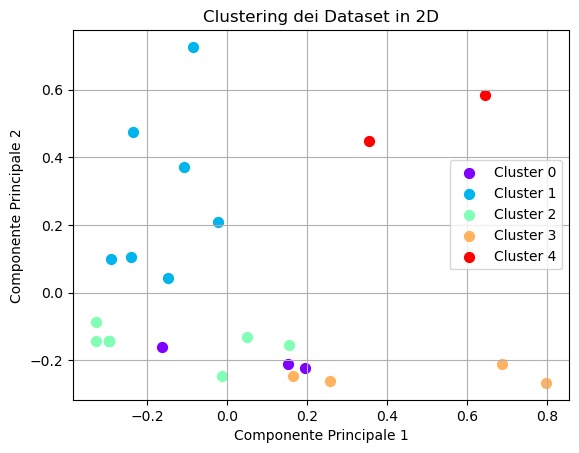

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tokenizzazione delle stringhe e creazione di rappresentazioni vettoriali
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(set_features)

# Calcolo della similarità tra dataset basata sulla similarità del coseno
similarity_matrix = cosine_similarity(X)

# Applicazione di DBSCAN per raggruppare i dataset
#eps = 1.2  # Distanza massima tra due campioni per appartenere allo stesso cluster
#min_samples = 2  # Numero minimo di campioni in un vicinato per formare un cluster
#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#clusters = dbscan.fit_predict(similarity_matrix)

# Applicazione di K-Means per raggruppare i dataset
num_clusters = len(set(categories))  # Numero di cluster desiderati = numero categorie
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(similarity_matrix)


# Riduzione dimensionale con PCA a 2 componenti
pca = PCA(n_components=2)
X_pca = pca.fit_transform(similarity_matrix)

# Plot in 2D dei cluster
unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster_label, color in zip(unique_clusters, colors):
    cluster_mask = (clusters == cluster_label)
    plt.scatter(
        X_pca[cluster_mask, 0],
        X_pca[cluster_mask, 1],
        label=f'Cluster {cluster_label}',
        color=color,
        s=50
    )

# Impostazioni del plot
plt.title('Clustering dei Dataset in 2D')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend()
plt.grid(True)
plt.show()

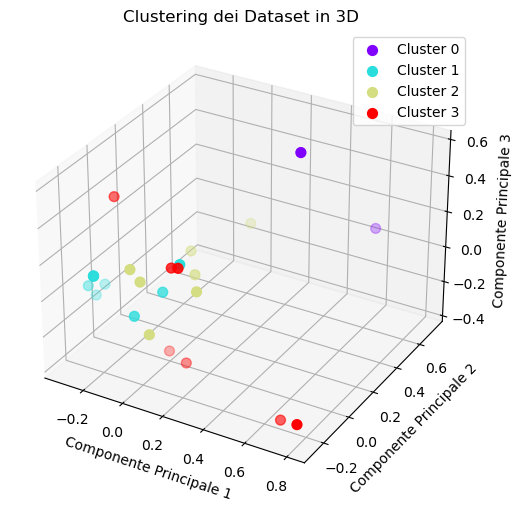

In [105]:
# Riduzione dimensionale con PCA a 3 componenti
pca = PCA(n_components=3)
X_pca = pca.fit_transform(similarity_matrix)

# Plot in 3D dei cluster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Estrai punti per ciascun cluster
unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster_label, color in zip(unique_clusters, colors):
    cluster_mask = (clusters == cluster_label)
    ax.scatter(
        X_pca[cluster_mask, 0],
        X_pca[cluster_mask, 1],
        X_pca[cluster_mask, 2],
        label=f'Cluster {cluster_label}',
        color=color,
        s=50
    )

# Impostazioni del plot
ax.set_title('Clustering dei Dataset in 3D')
ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')
ax.legend()
plt.show()

In [142]:
# Organizzazione dei dataset per cluster
dataset_per_cluster = {}
for i, cluster_label in enumerate(clusters):
    if cluster_label not in dataset_per_cluster:
        dataset_per_cluster[cluster_label] = []
    dataset_per_cluster[cluster_label].append(set_features[i])

# Visualizzazione dei dataset per ciascun cluster
for cluster_label, datasets in dataset_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for dataset in datasets:
        print(f"categoria: {dictionary[dataset]}")
        print(f"features: {dataset}")
        print()
    print("-----")

Cluster 2:
categoria: sport
features: Unnamed: 0 player_name team_abbreviation age player_height player_weight college country draft_year draft_round draft_number gp pts reb ast net_rating oreb_pct dreb_pct usg_pct ts_pct ast_pct season 

categoria: music
features: mbid artist_mb artist_lastfm country_mb country_lastfm tags_mb tags_lastfm listeners_lastfm scrobbles_lastfm ambiguous_artist 

categoria: medicine
features: baseline value accelerations fetal_movement uterine_contractions light_decelerations severe_decelerations prolongued_decelerations abnormal_short_term_variability mean_value_of_short_term_variability percentage_of_time_with_abnormal_long_term_variability mean_value_of_long_term_variability histogram_width histogram_min histogram_max histogram_number_of_peaks histogram_number_of_zeroes histogram_mode histogram_mean histogram_median histogram_variance histogram_tendency fetal_health 

categoria: education
features: Countries and areas Latitude  Longitude OOSR_Pre0Primary_

In [144]:
# Visualizzazione solo categorie
for cluster_label, datasets in dataset_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for dataset in datasets:
        print(f"categoria: {dictionary[dataset]}")
    print("-----")

Cluster 2:
categoria: sport
categoria: music
categoria: medicine
categoria: education
categoria: music
categoria: education
categoria: sport
categoria: education
categoria: music
categoria: music
-----
Cluster 1:
categoria: social
categoria: sport
categoria: sport
categoria: sport
categoria: social
categoria: sport
categoria: sport
-----
Cluster 0:
categoria: medicine
categoria: medicine
categoria: education
-----
Cluster 4:
categoria: sport
categoria: sport
-----
Cluster 3:
categoria: medicine
categoria: medicine
categoria: medicine
categoria: education
-----


In [39]:
#WORD2VEC


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api

model = api.load("word2vec-google-news-300")
